In [1]:
import pandas as pd
from igraph import Graph
import warnings

warnings.filterwarnings('ignore')

edges_df = pd.read_csv('./Cora/edges.csv')
group_df = pd.read_csv('./Cora/group-edges.csv')

cora = Graph.DataFrame(edges_df)

for _, row in group_df.iterrows():
    cora.vs.find(name=row["paper"])["classification"] = row["classification"]

print(Graph.summary(cora))

IGRAPH DN-- 2708 5429 -- 
+ attr: classification (v), name (v)


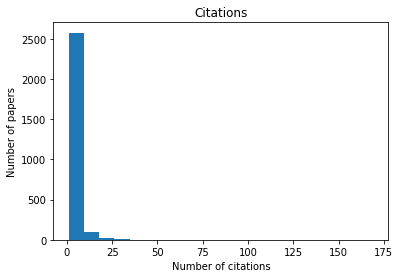

Most cited papers:  [(35, 169), (6213, 79), (1365, 74), (3229, 65), (910, 46), (114, 42), (4330, 40), (3231, 37), (1272, 34), (19621, 34), (4584, 32), (6214, 32), (2440, 31), (2665, 31), (887, 30), (24966, 29), (8224, 26), (12182, 23), (12576, 23), (20193, 23)]

Scientific paper 35 	 cited 169 	 times.
Scientific paper 6213 	 cited 79 	 times.
Scientific paper 1365 	 cited 74 	 times.
Scientific paper 3229 	 cited 65 	 times.
Scientific paper 910 	 cited 46 	 times.
Scientific paper 114 	 cited 42 	 times.
Scientific paper 4330 	 cited 40 	 times.
Scientific paper 3231 	 cited 37 	 times.
Scientific paper 1272 	 cited 34 	 times.
Scientific paper 19621 	 cited 34 	 times.
Scientific paper 4584 	 cited 32 	 times.
Scientific paper 6214 	 cited 32 	 times.
Scientific paper 2440 	 cited 31 	 times.
Scientific paper 2665 	 cited 31 	 times.
Scientific paper 887 	 cited 30 	 times.
Scientific paper 24966 	 cited 29 	 times.
Scientific paper 8224 	 cited 26 	 times.
Scientific paper 12182 	 

In [2]:
import operator
import matplotlib.pyplot as plt

deg = list(zip(cora.vs["name"], cora.degree()))
deg.sort(key=operator.itemgetter(1), reverse=True)

plt.hist(cora.degree(), bins=20)
plt.title("Citations")
plt.xlabel("Number of citations")
plt.ylabel("Number of papers")
plt.show()

print("Most cited papers: ", deg[:20], end='\n\n')
for paper in deg[:20]:
    print(f"Scientific paper {paper[0]} \t cited {paper[1]} \t times.")

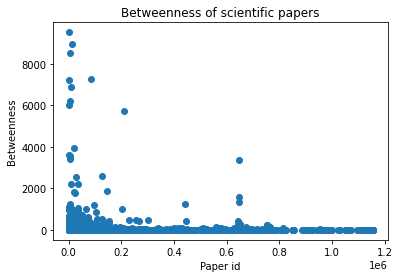

Papers with the highest betweenness:  [(1272, 9523.499999999998), (13686, 8970.499999999996), (6184, 8543.666666666664), (85688, 7271.0), (887, 7209.966666666667), (8224, 6908.333333333332), (6213, 6223.200000000001), (3229, 6014.333333333333), (210871, 5711.983333333333), (22563, 3969.250000000001), (35, 3620.766666666667), (6913, 3552.583333333333), (4330, 3402.583333333333), (646286, 3374.583333333333), (126927, 2592.0), (27535, 2547.3333333333335), (35061, 2235.6166666666663), (8703, 2218.8333333333335), (144408, 1858.0), (19621, 1806.0)]

Scientific paper 1272 	 with betweenness = 9523.50.
Scientific paper 13686 	 with betweenness = 8970.50.
Scientific paper 6184 	 with betweenness = 8543.67.
Scientific paper 85688 	 with betweenness = 7271.00.
Scientific paper 887 	 with betweenness = 7209.97.
Scientific paper 8224 	 with betweenness = 6908.33.
Scientific paper 6213 	 with betweenness = 6223.20.
Scientific paper 3229 	 with betweenness = 6014.33.
Scientific paper 210871 	 with be

In [3]:
betw = list(zip(cora.vs["name"], cora.betweenness()))
betw.sort(key=operator.itemgetter(1), reverse=True)

plt.scatter([x for (x, y) in betw], [y for (x, y) in betw])
plt.title("Betweenness of scientific papers")
plt.xlabel("Paper id")
plt.ylabel("Betweenness")
plt.show()

print("Papers with the highest betweenness: ", betw[:20], end='\n\n')

for paper in betw[:20]:
    print(f"Scientific paper {paper[0]} \t with betweenness = {paper[1]:.2f}.")

In [4]:
edge_betw = list(zip([cora.es[i].tuple for i in range(len(cora.es))], cora.es.edge_betweenness()))
edge_betw.sort(key=operator.itemgetter(1), reverse=True)

print("Citations with the highest betweenness: ", edge_betw[:20])

Citations with the highest betweenness:  [((258, 27), 9245.499999999998), ((27, 825), 7309.0), ((825, 173), 6946.333333333332), ((13, 121), 5655.033333333334), ((117, 258), 5147.833333333334), ((121, 117), 4941.333333333334), ((1217, 13), 4648.983333333333), ((117, 71), 3554.333333333333), ((1740, 150), 3481.583333333333), ((173, 355), 3186.333333333334), ((498, 1217), 3132.0), ((150, 84), 3039.583333333333), ((403, 258), 2828.8333333333335), ((991, 1740), 2406.7500000000005), ((328, 117), 2099.0), ((1064, 71), 2038.0), ((182, 403), 1889.3333333333333), ((1217, 0), 1835.8333333333335), ((0, 13), 1760.9833333333333), ((1738, 991), 1694.3333333333335)]


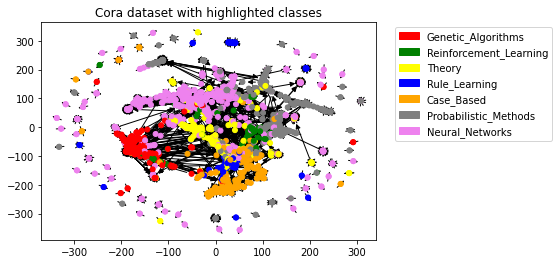

In [5]:
import igraph as ig
import matplotlib.patches as mpatches
from igraph.drawing.utils import BoundingBox

available_colors = ['red', 'green', 'yellow', 'blue', 'orange', 'gray', 'violet']

classes = []
for c in cora.vs["classification"]:
    if c not in classes:
        classes.append(c)
        
color_dict = {}
for i in range(0, 7):
    color_dict[classes[i]] = available_colors[i]
        
layout = cora.layout("auto")

visual_style = {}
visual_style["layout"] = layout
visual_style["bbox"] = (2000, 2000)
visual_style["vertex_color"] = [color_dict[c] for c in cora.vs["classification"]]
fig, ax = plt.subplots()

description = zip(available_colors, classes)
patches = []
for d in description:
    patches.append(mpatches.Patch(color=d[0], label=d[1]))
ax.legend(handles=patches, bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Cora dataset with highlighted classes")
ig.plot(cora, target=ax, **visual_style)

In [6]:
number_of_cliques = cora.clique_number()
cliques = cora.cliques()

print("Size of the largest clique in the graph: ", number_of_cliques, "\n")

limit = 4
print(f"Cliques with more than {limit} nodes: ")
i = 1
for clique in cliques:
    if len(clique) > limit:
        print(i, ": ", clique)
        i += 1

Size of the largest clique in the graph:  5 

Cliques with more than 4 nodes: 
1 :  (149, 241, 242, 1777, 2284)
2 :  (490, 491, 492, 840, 2279)
3 :  (173, 354, 613, 614, 615)
4 :  (205, 463, 464, 568, 1802)
5 :  (205, 462, 463, 464, 1802)
6 :  (204, 355, 356, 357, 1935)
7 :  (148, 149, 241, 242, 2284)
8 :  (87, 111, 113, 121, 122)
9 :  (114, 121, 126, 127, 977)


In [7]:
names = {
    "bipartite": cora.is_bipartite(),
    "connected": cora.is_connected(),
    "directed and acyclical": cora.is_dag(),
    "chordal": cora.is_chordal(),
    "tree": cora.is_tree()
    }

for key, value in names.items():
    if value:
        print("Cora graph is ", key)
    else:
        print("Cora graph is not ", key)

Cora graph is not  bipartite
Cora graph is not  connected
Cora graph is not  directed and acyclical
Cora graph is not  chordal
Cora graph is not  tree


In [8]:
number_of_edges = len(cora.es)
number_of_vertices = len(cora.vs)

density = 2 * number_of_edges / (number_of_vertices * (number_of_vertices - 1))

print("Number of edges: ", number_of_edges, "Number of vertices: ", number_of_vertices)
print(f"Density of the graph: {round(density*100, 4)}%")

Number of edges:  5429 Number of vertices:  2708
Density of the graph: 0.1481%


In [9]:
diameter = cora.diameter()
farthest_points = cora.farthest_points()

print("Diameter of the cora graph is ", diameter)
print("Two furthest away papers are ", farthest_points[0], "and", farthest_points[1])
print("Their respective classes are ", cora.vs[farthest_points[0]]["classification"], "and",  cora.vs[farthest_points[1]]["classification"])

Diameter of the cora graph is  15
Two furthest away papers are  472 and 834
Their respective classes are  Neural_Networks and Probabilistic_Methods


In [10]:
centrality_measures = [cora.closeness, cora.eigenvector_centrality, cora.harmonic_centrality]

for measure in centrality_measures:
    centrality = list(zip(cora.vs["name"], measure()))
    centrality.sort(key=operator.itemgetter(1), reverse=True)

    print(f"Highest {measure.__name__} for {centrality[:10]}\n")

Highest closeness for [(4553, 1.0), (7041, 1.0), (9559, 1.0), (14429, 1.0), (17821, 1.0), (29738, 1.0), (38771, 1.0), (43165, 1.0), (44121, 1.0), (47839, 1.0)]

Highest eigenvector_centrality for [(126927, 1.0), (103543, 0.8103577379265681), (645897, 0.7405750033255182), (644093, 0.6002031960475818), (646286, 0.5873883585685155), (126920, 0.4476229868548989), (1131236, 0.4084301190482921), (126912, 0.36273475107166936), (6913, 0.2629285315062353), (1135108, 0.25719430001626536)]

Highest harmonic_centrality for [(35, 0.28825915495660565), (6213, 0.26100938937104884), (3229, 0.25510465092105605), (887, 0.25487146252754234), (4584, 0.24603087980443306), (6214, 0.24318552296941914), (1272, 0.24301887416036086), (1365, 0.23828143698848958), (12576, 0.23685192203847), (6184, 0.23620391737310817)]



In [11]:
spanning_tree = cora.spanning_tree(weights=None, return_tree=False)

print("Size of the spanning tree:", len(spanning_tree))

Size of the spanning tree: 2630


In [12]:
avg_path_length = cora.average_path_length()

print(f"Average path length in Cora dataset is {avg_path_length}")

Average path length in Cora dataset is 4.792152144545762


In [13]:
import numpy as np

np.set_printoptions(threshold = 100)

articulation_points = np.array(cora.articulation_points())
bridges = np.array(cora.bridges())

print(f"{len(articulation_points)} Articulation points in Cora: ", articulation_points)
print(f"{len(bridges)} Bridges in Cora: ", bridges)

389 Articulation points in Cora:  [   0    1    2 ... 2633 2634 2689]
507 Bridges in Cora:  [   3    8    9 ... 5394 5401 5410]


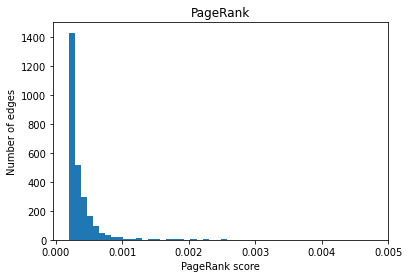

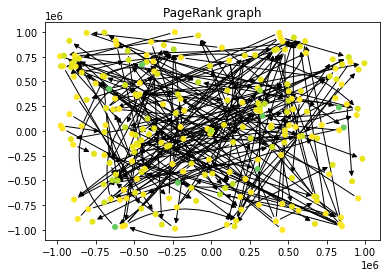

In [14]:
page_rank = cora.personalized_pagerank()

plt.hist(page_rank, bins=50)
plt.title("PageRank")
plt.xlabel("PageRank score")
plt.ylabel("Number of edges")
plt.show()

rankMin = min(page_rank)
rankMax = max(page_rank)

for i in range(len(page_rank)):
    page_rank[i] = ((page_rank[i] - rankMin) * 1/(rankMax - rankMin))
    

layout = cora.layout("lgl")
fig, ax = plt.subplots()
plt.title("PageRank graph")
ig.plot(cora, target=ax, layout=layout, vertex_color=[(1 - rank) for rank in page_rank])

Dendrogram, 2708 elements, 2630 merges


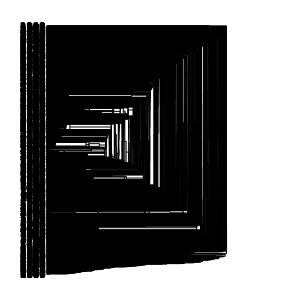

In [15]:
communities = cora.community_edge_betweenness()

print(communities)

ig.plot(communities, bbox=(300, 300), target="dendrogram-small.png")

In [16]:
print(communities.as_clustering(n=communities.optimal_count).summary(), end='\n\n')

ig.plot(communities.as_clustering(n=communities.optimal_count))

Clustering with 2708 elements and 1375 clusters



Subgraphs belonging to given cluster bigger than 10:

[('Genetic_Algorithms', 196), ('Reinforcement_Learning', 131), ('Theory', 84), ('Rule_Learning', 46), ('Case_Based', 76), ('Probabilistic_Methods', 34), ('Neural_Networks', 124)]


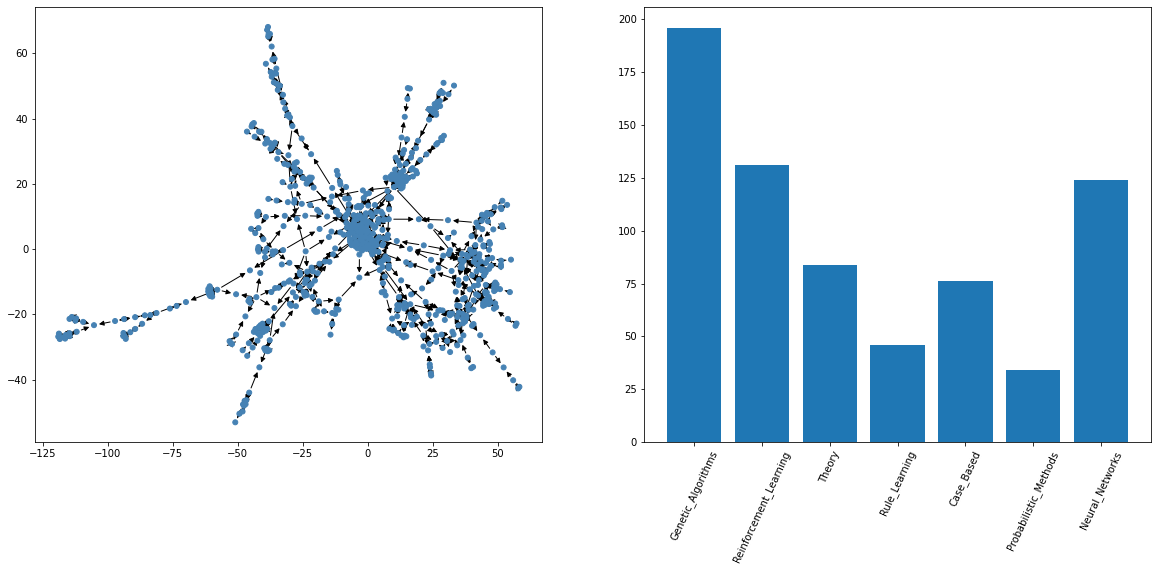

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 2), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 16), ('Neural_Networks', 27)]


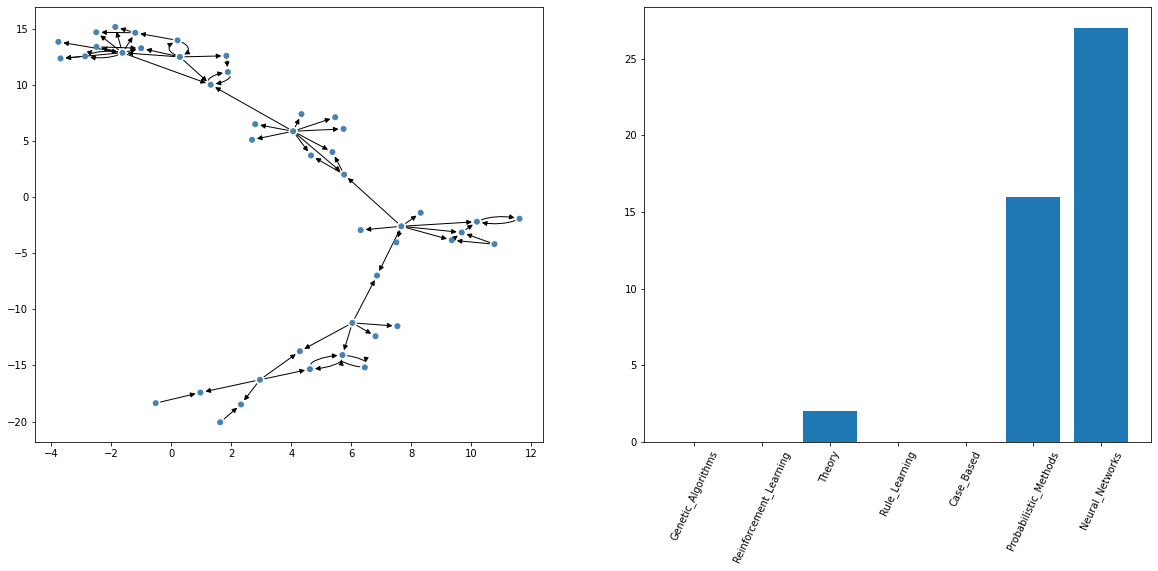

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 0), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 39), ('Neural_Networks', 0)]


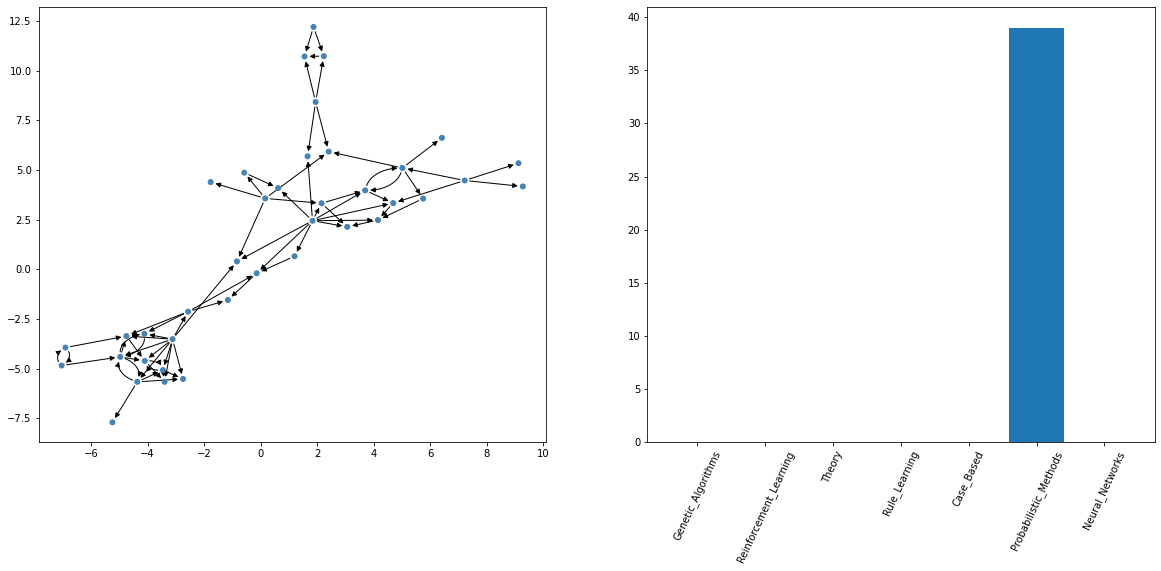

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 0), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 35), ('Neural_Networks', 0)]


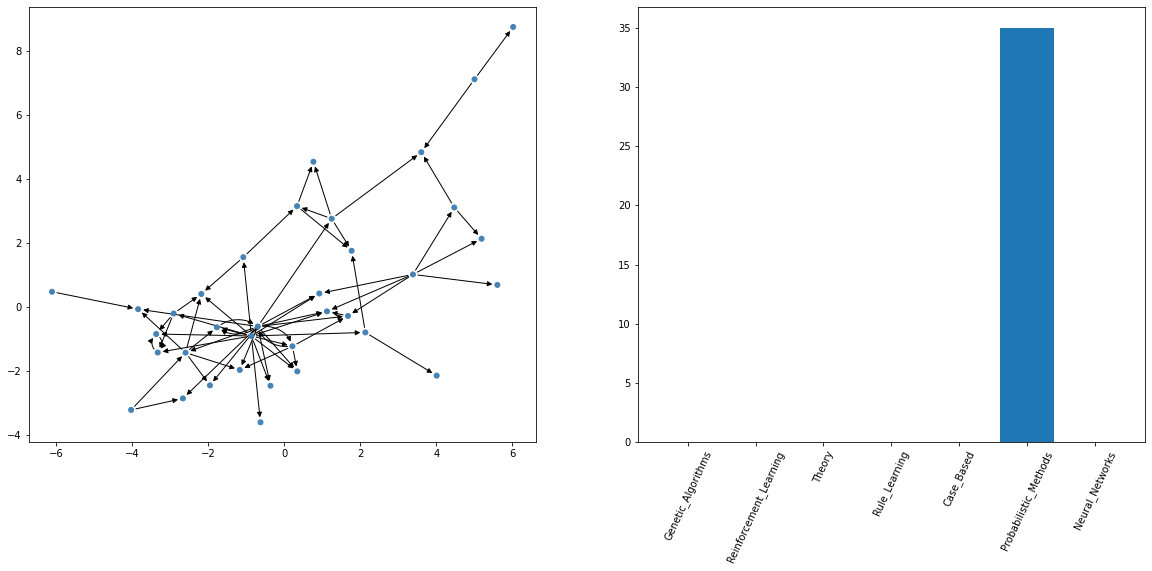

[('Genetic_Algorithms', 1), ('Reinforcement_Learning', 0), ('Theory', 8), ('Rule_Learning', 12), ('Case_Based', 6), ('Probabilistic_Methods', 1), ('Neural_Networks', 5)]


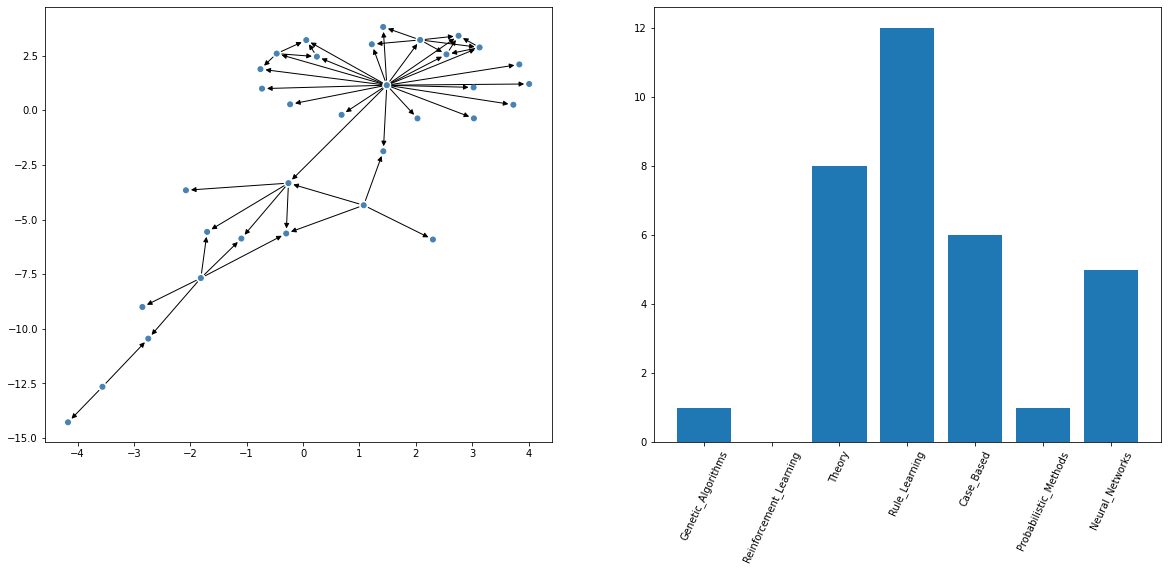

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 0), ('Rule_Learning', 0), ('Case_Based', 22), ('Probabilistic_Methods', 0), ('Neural_Networks', 0)]


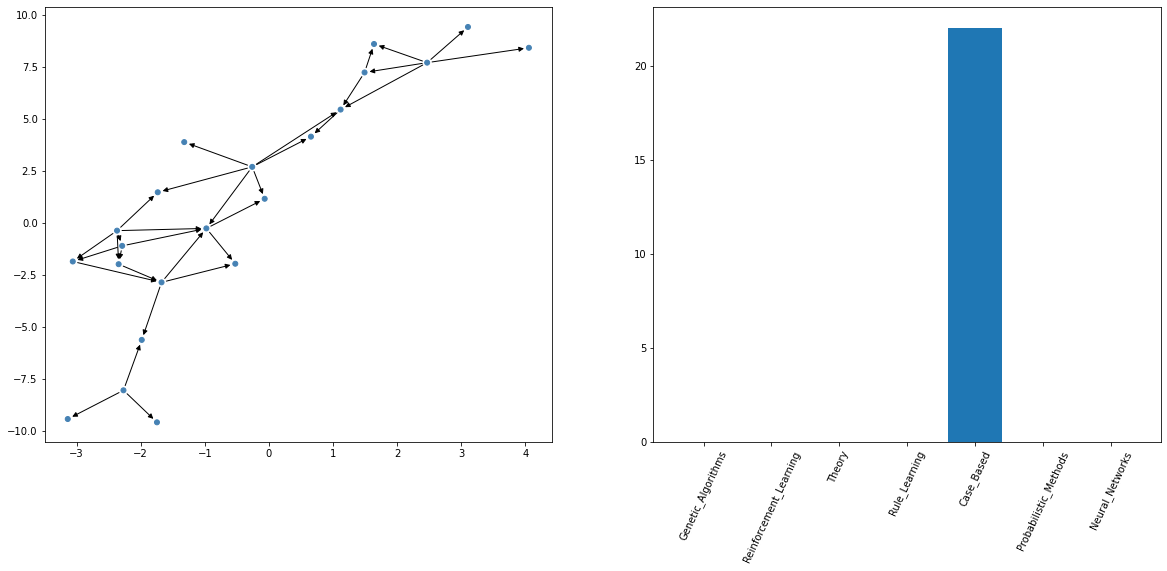

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 1), ('Rule_Learning', 10), ('Case_Based', 4), ('Probabilistic_Methods', 0), ('Neural_Networks', 0)]


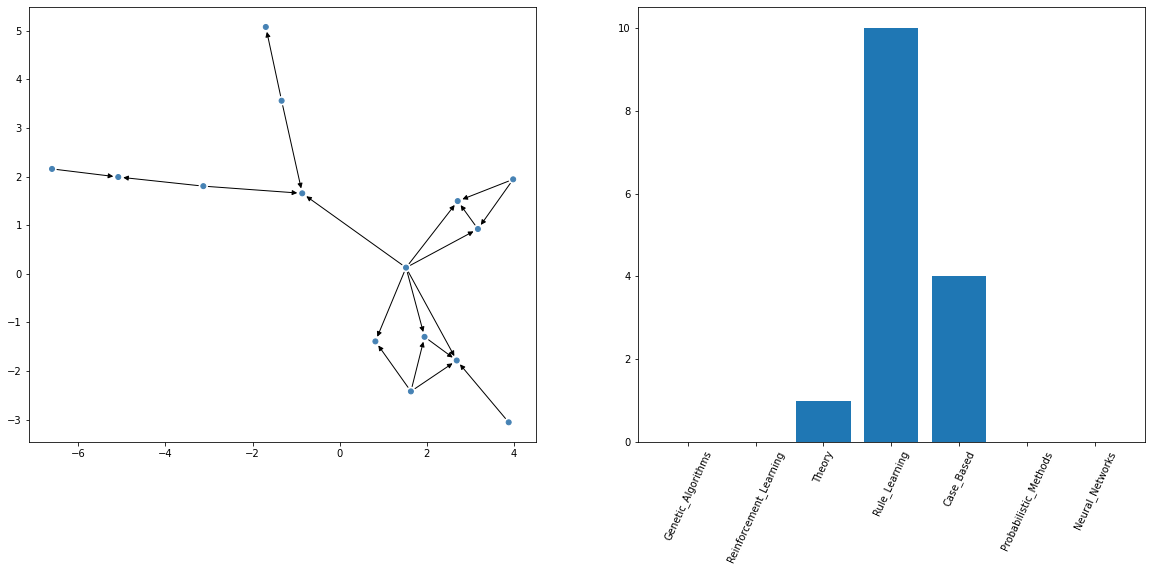

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 0), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 0), ('Neural_Networks', 14)]


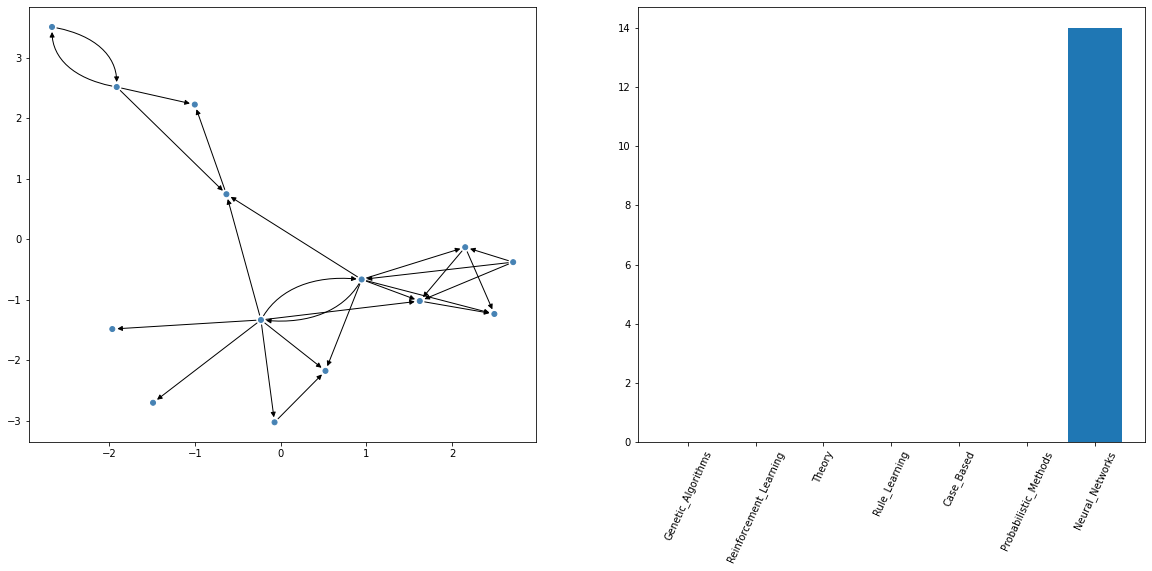

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 1), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 4), ('Neural_Networks', 9)]


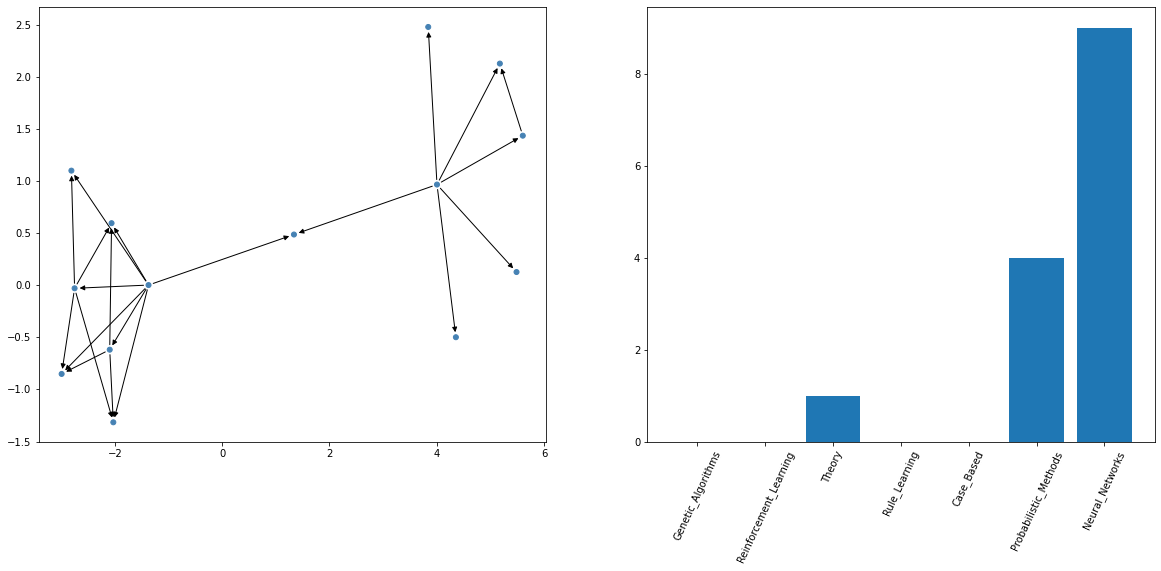

[('Genetic_Algorithms', 12), ('Reinforcement_Learning', 0), ('Theory', 1), ('Rule_Learning', 0), ('Case_Based', 1), ('Probabilistic_Methods', 0), ('Neural_Networks', 0)]


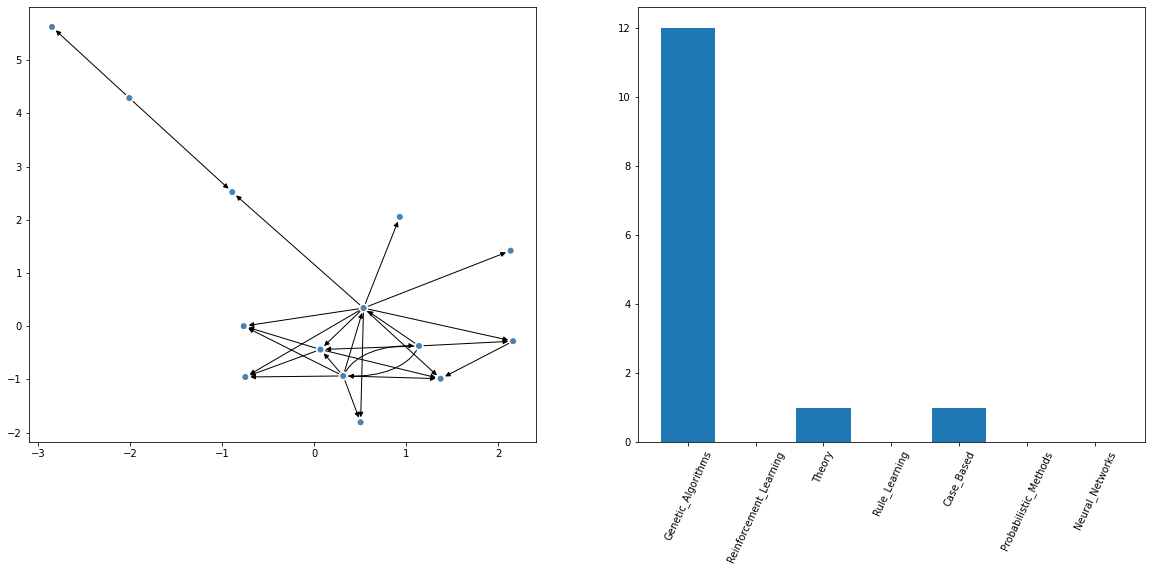

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 1), ('Rule_Learning', 2), ('Case_Based', 9), ('Probabilistic_Methods', 0), ('Neural_Networks', 1)]


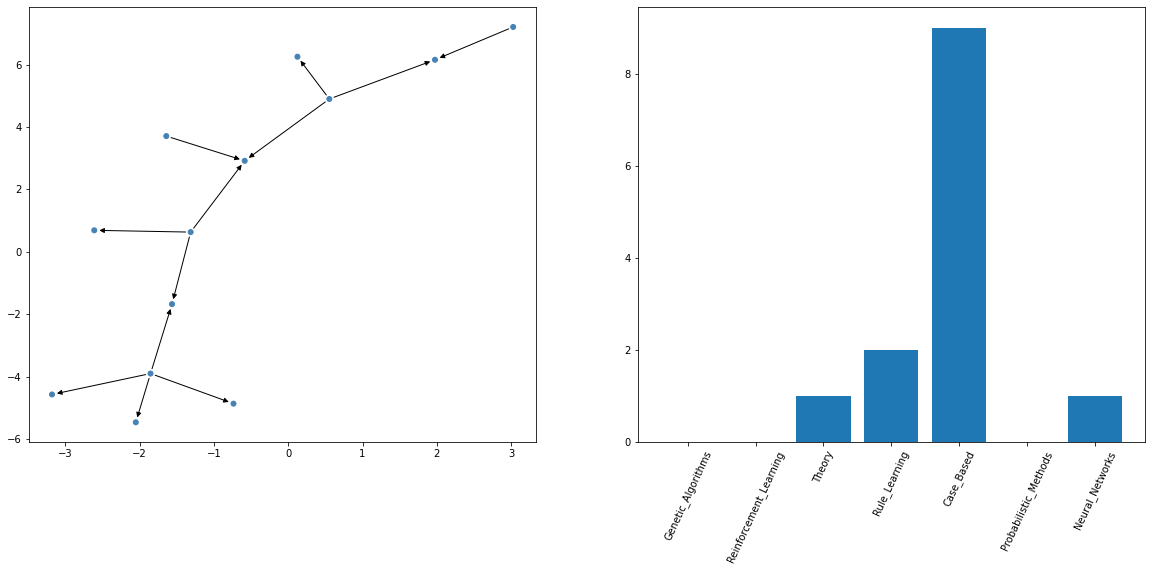

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 0), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 0), ('Neural_Networks', 13)]


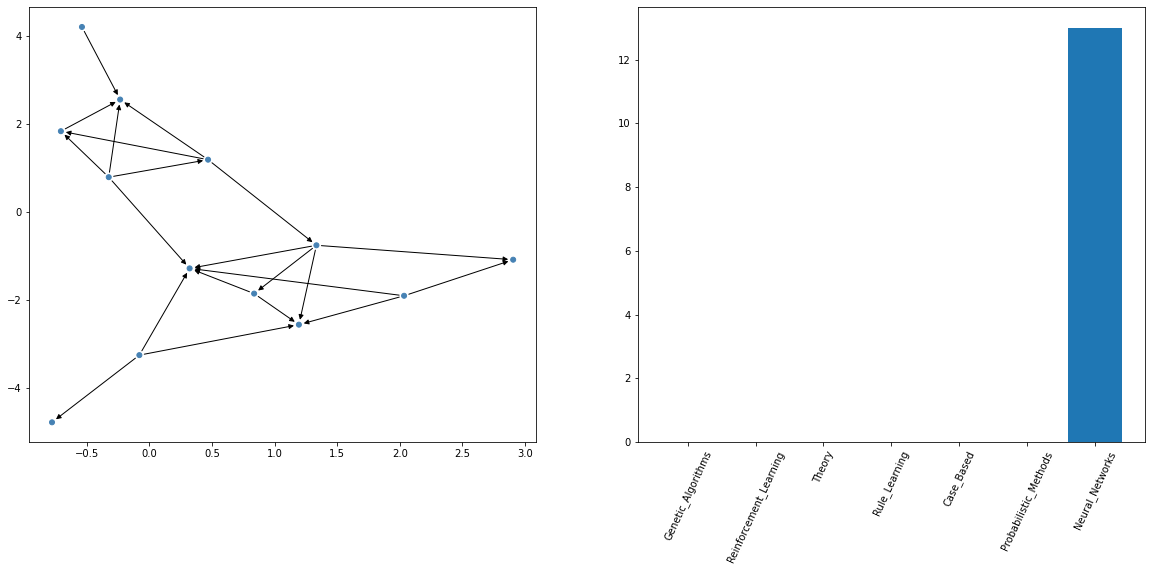

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 0), ('Rule_Learning', 12), ('Case_Based', 0), ('Probabilistic_Methods', 0), ('Neural_Networks', 0)]


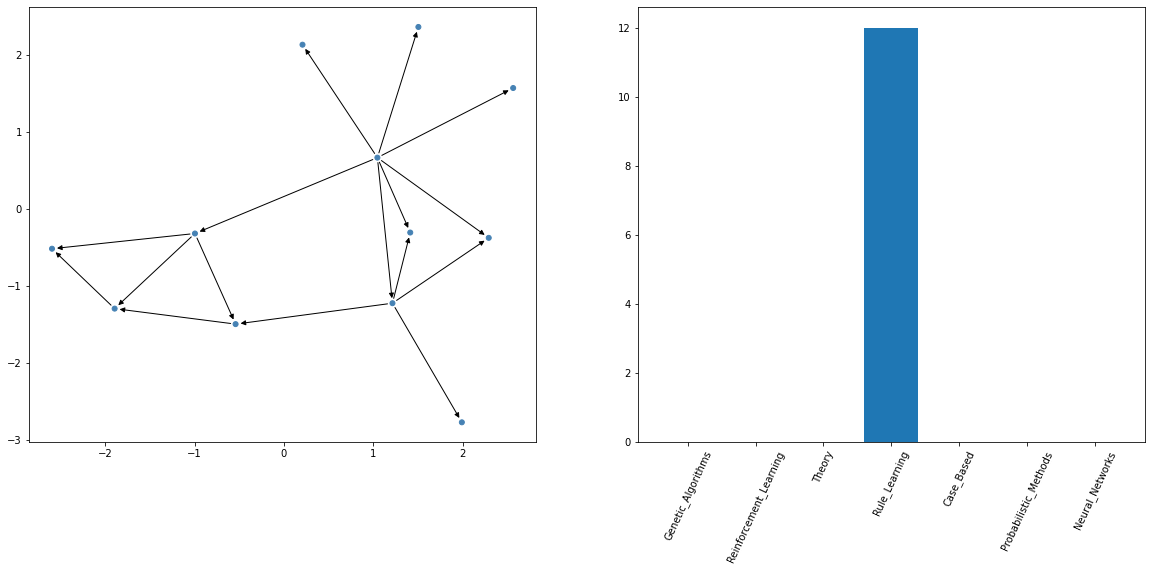

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 10), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 0), ('Neural_Networks', 2)]


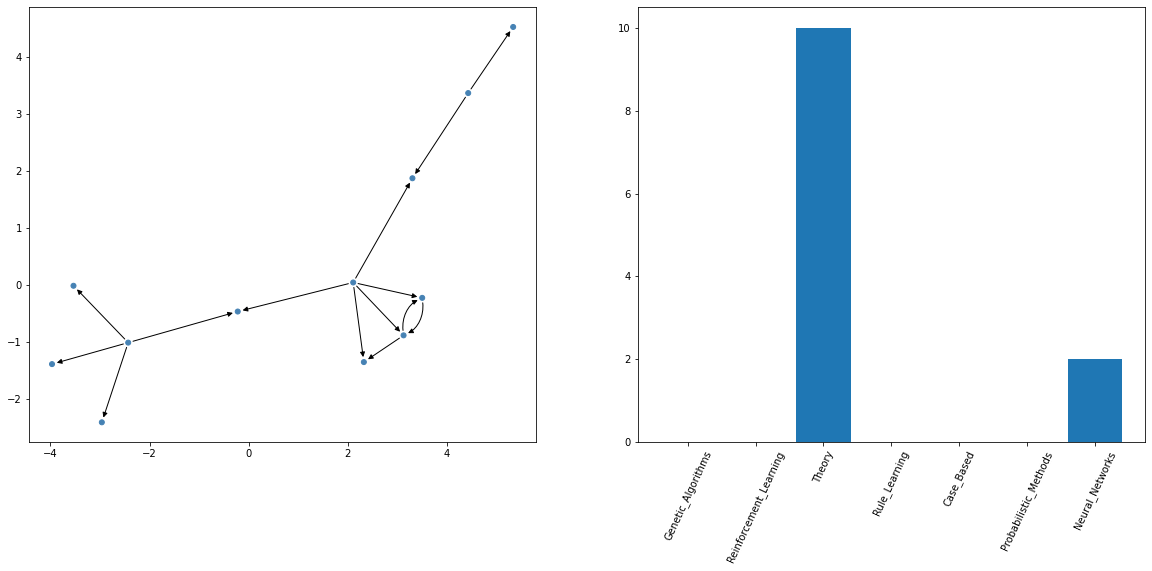

[('Genetic_Algorithms', 0), ('Reinforcement_Learning', 0), ('Theory', 5), ('Rule_Learning', 0), ('Case_Based', 0), ('Probabilistic_Methods', 6), ('Neural_Networks', 0)]


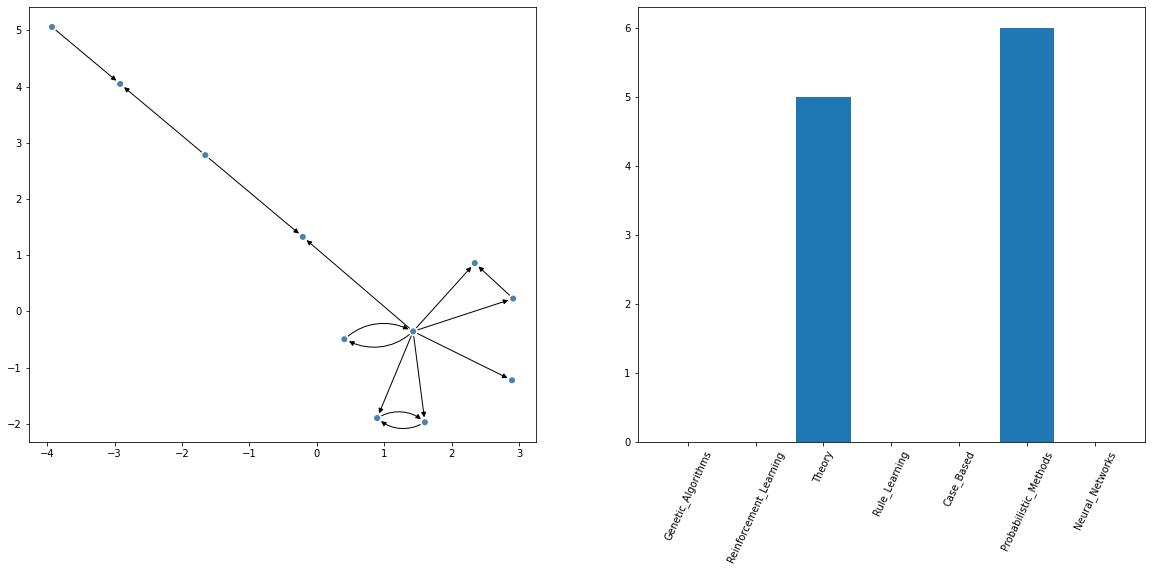

In [17]:
subgraphs = communities.as_clustering(n=communities.optimal_count).subgraphs()

subgraphs.sort(key=lambda x: len(x.vs), reverse=True)

print('Subgraphs belonging to given cluster bigger than 10:', end='\n\n')

for i, subgraph in enumerate(subgraphs):
    if len(subgraph.vs) > 10:
        print([(x, subgraph.vs["classification"].count(x)) for x in classes])
        
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        ax[1].bar(classes, [subgraph.vs["classification"].count(x) for x in classes])
        ax[1].set_xticklabels(classes, rotation=65)
        ig.plot(subgraph, target=ax[0])
        
        plt.show()